In [4]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


Correlations with PRP:
|       | PRP       |
|:------|:----------|
| MYCT  | -0.307099 |
| MMIN  | 0.794931  |
| MMAX  | 0.863004  |
| CACH  | 0.662641  |
| CHMIN | 0.608903  |
| CHMAX | 0.605209  |
| PRP   | 1         |
| ERP   | 0.966472  |


C:\Users\moon\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\moon\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


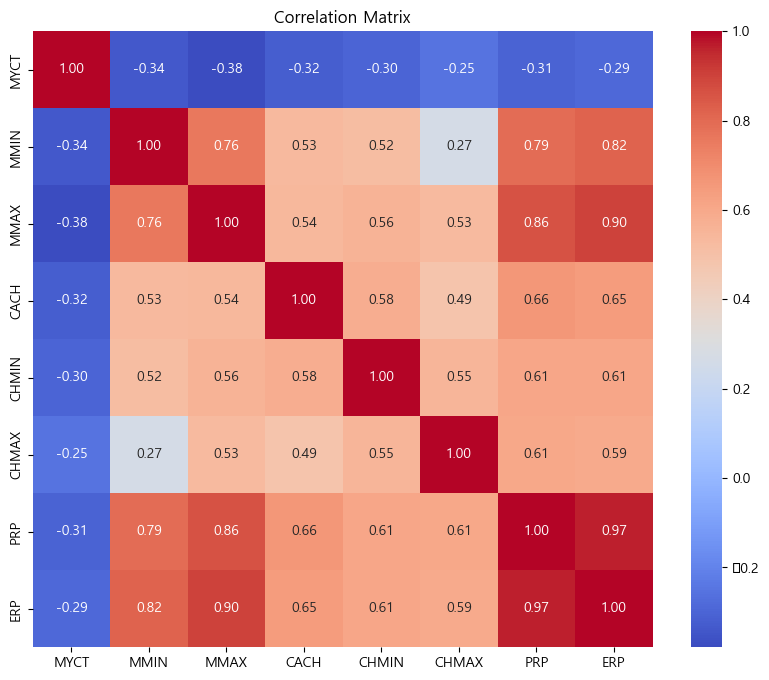


## 1. 다중 선형 회귀 모델링

### 1.1. 모델링 결과

### 1.2. 교차 검증 결과
Mean R^2: 0.8334
Standard Deviation of R^2: 0.0726

### 1.3. 평가 지표
|    | Metric   |   Training |   Testing |
|----|----------|------------|-----------|
|  0 | MSE      |  1529.0205 | 2370.0964 |
|  1 | MAE      |    23.2323 |   31.4062 |
|  2 | R^2      |     0.9205 |    0.9534 |

### 1.4. 모델 계수 및 절편
MYCT: -0.0133
MMIN: 0.0016
MMAX: -0.0014
CACH: -0.0385
CHMIN: 0.4550
CHMAX: 0.4334
ERP: 1.0644
Intercept: 7.3903


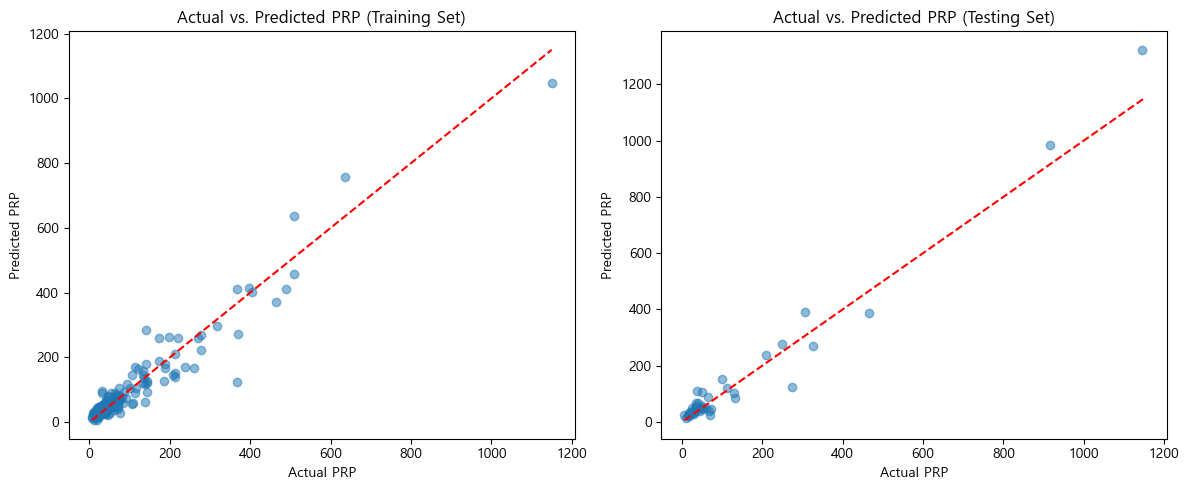

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from tabulate import tabulate

# matplotlib 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 한글 폰트 경로 (본인 환경에 맞게 수정)
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation between each feature and the target variable PRP
print("Correlations with PRP:")
print(correlation_matrix['PRP'].to_markdown(numalign="left", stralign="left"))

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Create feature matrix X and target vector y
X = df.drop('PRP', axis=1)
y = df['PRP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Create a DataFrame to store the evaluation metrics
results_df = pd.DataFrame(columns=['Metric', 'Training', 'Testing'])

# Add rows to the DataFrame
results_df.loc[len(results_df)] = ['MSE', mse_train, mse_test]
results_df.loc[len(results_df)] = ['MAE', mae_train, mae_test]
results_df.loc[len(results_df)] = ['R^2', r2_train, r2_test]

# Print the model's coefficients and intercept
print("\n## 1. 다중 선형 회귀 모델링")
print("\n### 1.1. 모델링 결과")

# 5-fold 교차검증 결과를 보기 좋게 출력합니다.
print("\n### 1.2. 교차 검증 결과")
print(f"Mean R^2: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R^2: {cv_scores.std():.4f}")

# 앞서 계산된 성능 평가 지표들을 표로 만들어 출력합니다.
print("\n### 1.3. 평가 지표")
print(tabulate(results_df, headers='keys', tablefmt='github', floatfmt=".4f"))

# 교차 검증 결과를 출력합니다.
print("\n### 1.4. 모델 계수 및 절편")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

#실제 값 대비 예측 값 산점도 그리기
print("\n### 1.5. 산점도 그리기")
plt.figure(figsize=(12, 5))

#훈련 세트 산점도
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs. Predicted PRP (Training Set)')

#테스트 세트 산점도
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs. Predicted PRP (Testing Set)')

plt.tight_layout()
plt.show()



평가 지표:
|    | Metric   |   Training |   Testing |
|----|----------|------------|-----------|
|  0 | MSE      |  1529.0205 | 2370.0964 |
|  1 | MAE      |    23.2323 |   31.4062 |
|  2 | R^2      |     0.9205 |    0.9534 |

교차 검증:
Mean R^2: 0.8334
Standard Deviation of R^2: 0.0726


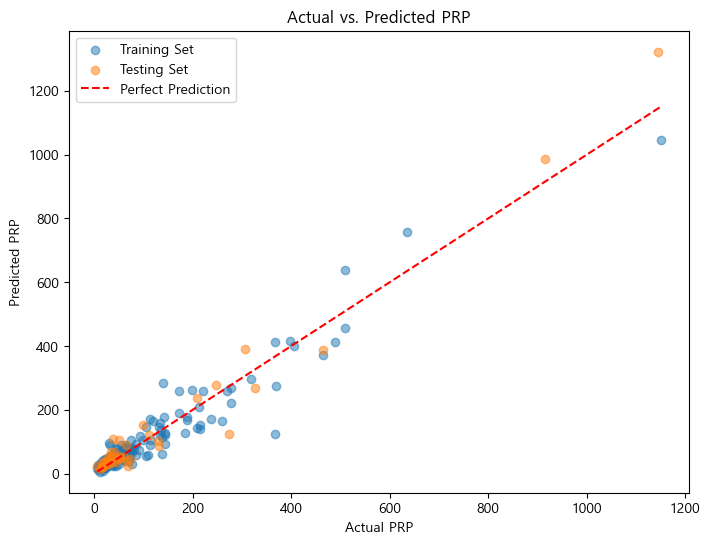

In [14]:
import matplotlib.pyplot as plt

# 평가 지표 DataFrame 출력
print("\n평가 지표:")
print(tabulate(results_df, headers='keys', tablefmt='github', floatfmt=".4f"))

# 교차 검증 평균 및 표준편차 출력
print("\n교차 검증:")
print(f"Mean R^2: {cv_scores.mean():.4f}")
print(f"Standard Deviation of R^2: {cv_scores.std():.4f}")

# 훈련 세트와 테스트 세트 데이터 병합
plt.figure(figsize=(8, 6))  # 그림 크기 설정
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Training Set')  # 훈련 세트 산점도
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Testing Set')  # 테스트 세트 산점도
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')  # 기준선
plt.xlabel('Actual PRP')  # x축 레이블
plt.ylabel('Predicted PRP')  # y축 레이블
plt.title('Actual vs. Predicted PRP')  # 제목
plt.legend()  # 범례 표시
plt.show()  # 그래프 출력
